In [23]:
#너무 멋진 시각화를 위한 모듈들
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
from pandas import DataFrame
import numpy as np 
import plotly.figure_factory as ff

#모델링을 위한 모듈
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn import *
from imblearn.over_sampling import SMOTE, ADASYN
import lightgbm as lgb


#그래프를 그리기 위한 모듈
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import warnings
import operator
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

import scipy as sp

import copy

ImportError: No module named 'imblearn'

<hr>
## Part A : Exploration
<hr>

## 1. Dataset Preparation

데이터 셋을 살펴보는 것으로 분석의 기초를 다진다.

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print ("Train Dataset: Rows, Columns: ", train.shape)
print ("Test Dataset: Rows, Columns: ", test.shape)

Train Dataset: Rows, Columns:  (9557, 143)
Test Dataset: Rows, Columns:  (23856, 142)


In [4]:
target = DataFrame(train["Target"])

train = train.drop(columns=["Id"])

train = train.drop(columns = ["idhogar"])


In [191]:
print ("Glimpse of Train Dataset: ")
train.head()

Glimpse of Train Dataset: 


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [192]:
print ("Summary of Train Dataset: ")
train.describe()

Summary of Train Dataset: 


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [193]:
print ("Top Columns having missing values")
missmap = train.isnull().sum().to_frame().sort_values(0, ascending = False)
missmap.head()

Top Columns having missing values


,0
rez_esc,7928
v18q1,7342
v2a1,6860
SQBmeaned,5
meaneduc,5


In [6]:
?plt.hist

<Figure size 2160x2160 with 0 Axes>

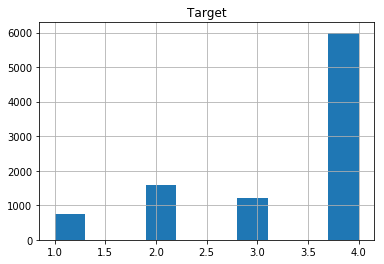

In [21]:
plt.figure(figsize=(30,30))

train.hist("Target")
plt

plt.show()

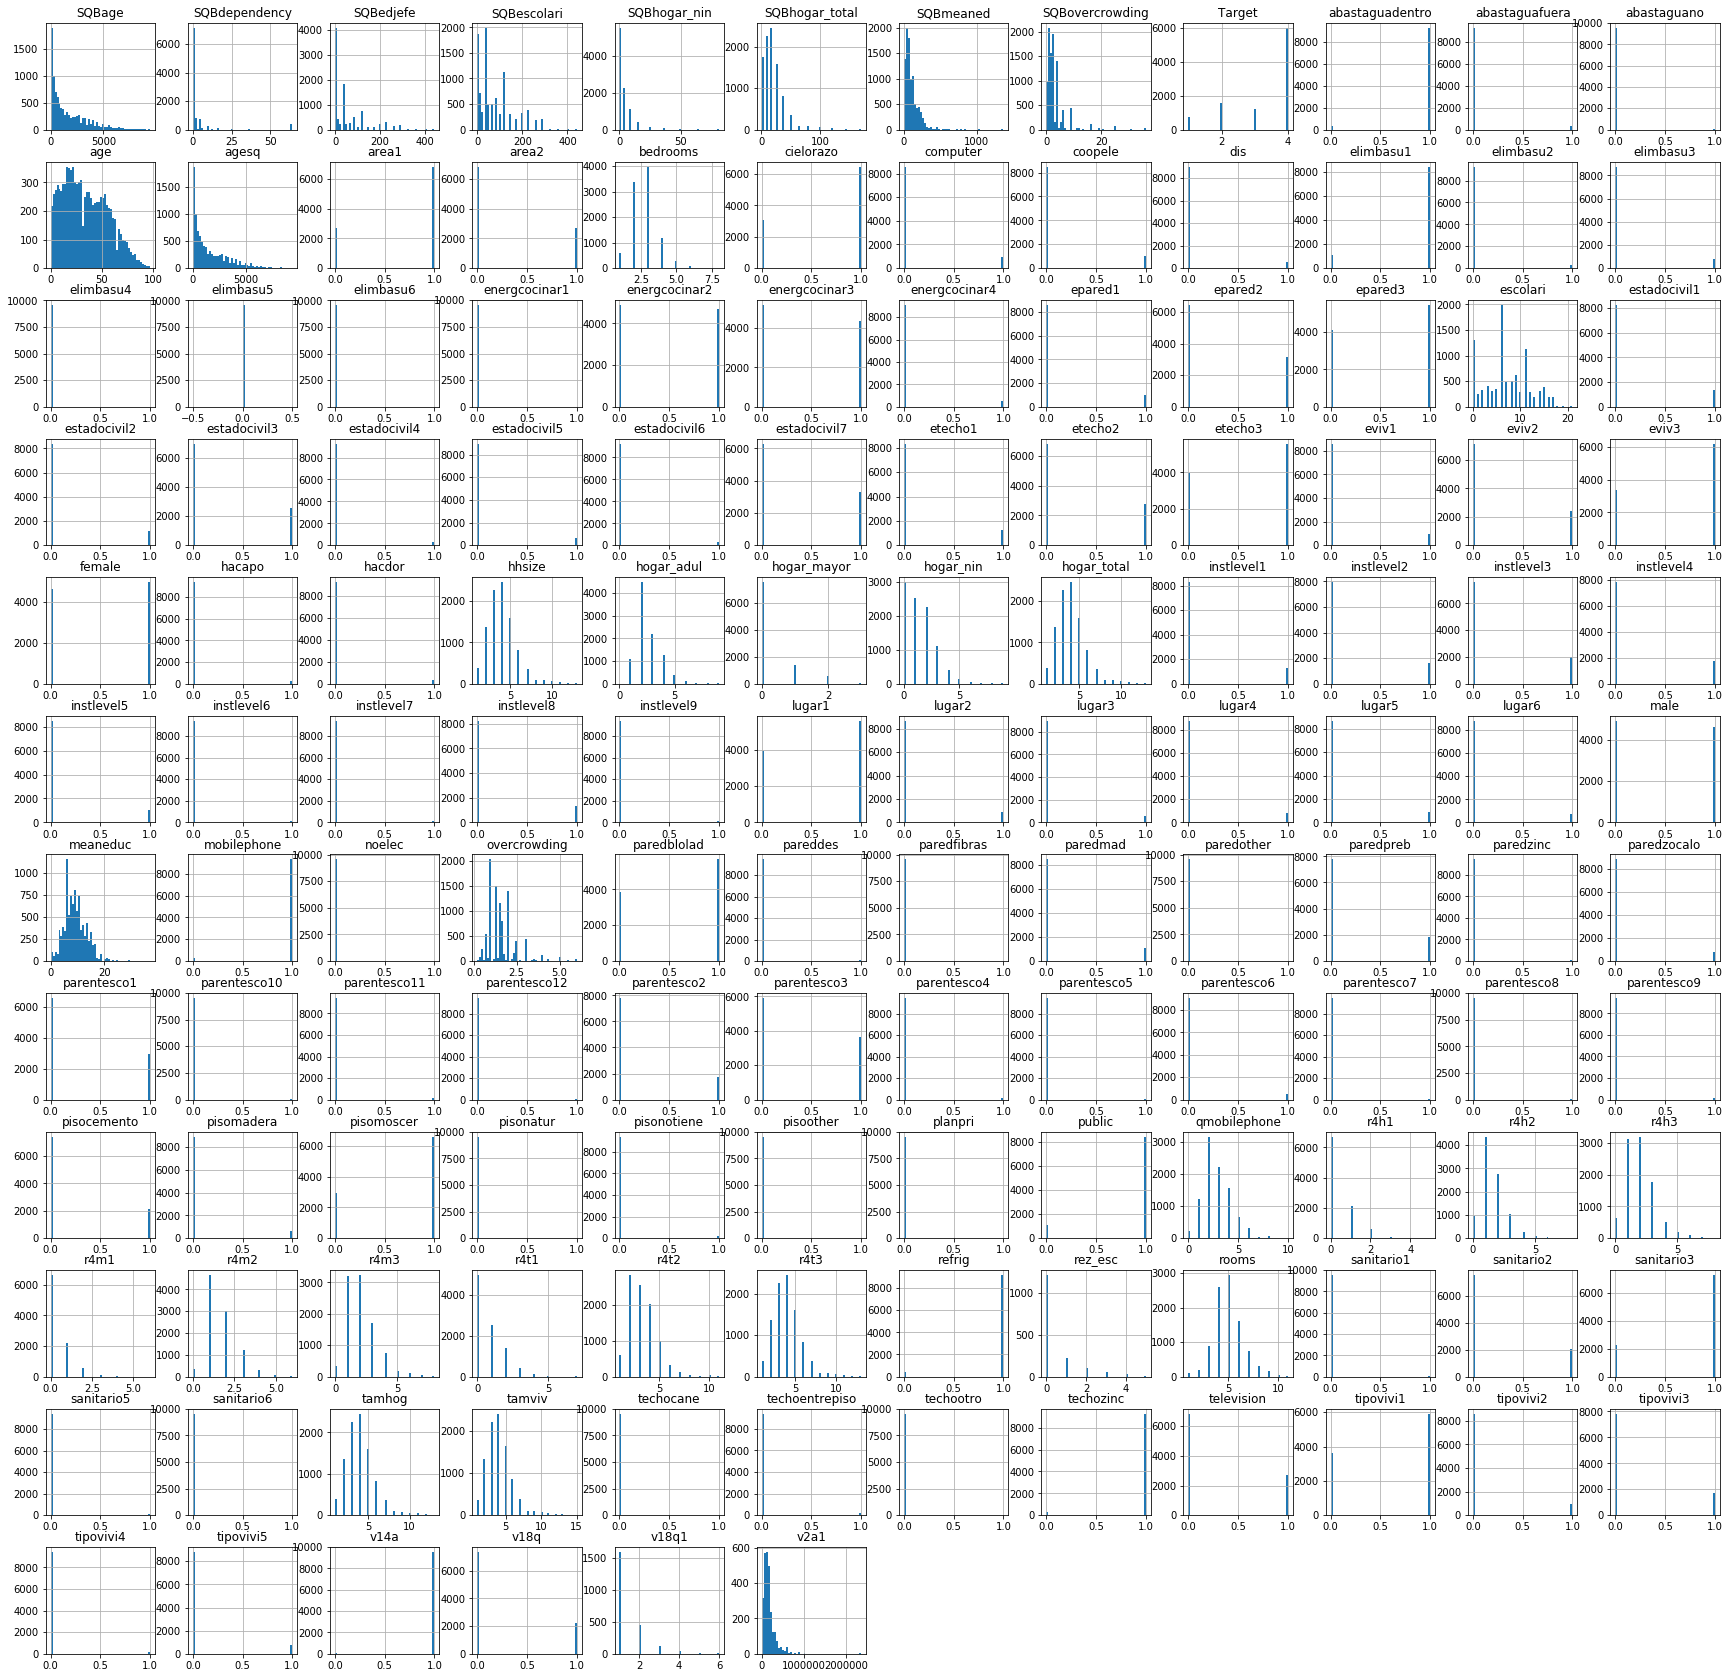

In [196]:
train.hist(bins=50,figsize = (30,30))

plt.show()

In [197]:
## 상관행렬도 히트맵

trace1 = {
  "x": train.columns, 
  "y": train.columns, 
  "z": 
    train.corr().values, 
  "name": "trace 0", 
  "type": "heatmap", 
  "uid": "0f0d45", 
}
    

fig = tools.make_subplots(rows=1, cols=1, print_grid=False)
fig.append_trace(trace1, 1, 1)
iplot(fig)

In [198]:
#핸드폰 보유 대수의 히스토그램

trace1 = go.Histogram(name="휴대폰 보유대수", x=train["qmobilephone"])
fig = tools.make_subplots(rows=1, cols=1, print_grid=False)
fig.append_trace(trace1, 1, 1)

fig['layout'].update(height=400, showlegend=False, title="핸드폰 보유 대수 히스토그램")
iplot(fig)
#원-핫-인코딩으로 만들어볼까?

In [199]:
#총 가구원수 변수의 동일 여부 검정
print((train["tamhog"] == train["hhsize"]).value_counts())
print("=================")
print((train["tamhog"] == train["hogar_total"]).value_counts())
print("=================")
print((train["tamhog"] == train["r4t3"]).value_counts())
print("=================")
print((train["tamhog"] == train["tamviv"]).value_counts())

True    9557
dtype: int64
True    9557
dtype: int64
True     9509
False      48
dtype: int64
True     9251
False     306
dtype: int64


In [200]:
#차이나는 총 가구원수 변수들 확인

print((train[train["tamhog"] != train["r4t3"]].loc[:,"r4t3":"tamhog"]).head(5))
print((train[train["tamhog"] != train["tamviv"]].loc[:,['tamhog','tamviv']]).head(5))

      r4t3  tamhog
497      3       1
640      4       3
641      4       3
642      4       3
1034     2       1
     tamhog  tamviv
130       4       6
131       4       6
132       4       6
133       4       6
195       4       6


In [201]:
print("=======결측값 확인=======")
print(train["v2a1"].isnull().value_counts())
print("===임대료 결측값의 자가소유 변수와의 상관관계===")
print(train[train["v2a1"].isnull()]["tipovivi1"].value_counts())
print("====자가 소유를 하고 있는 경우 대부분이 결측이다.====")
print(train[train["v2a1"].isnull()]["tipovivi2"].value_counts())
print("===자가 소유지만 대출이 있는 경우 전부 결측이 아니다.===")
print(train[train["v2a1"].isnull()]["tipovivi3"].value_counts())
print("=======임대의 경우 전부 결측이 아니다.=======")
print(train[train["v2a1"].isnull()]["tipovivi4"].value_counts())
print("====불확실의 경우 대부분이 결측이 아니지만, 일부(163건)의 결측치가 존재한다.====")
print(train[train["v2a1"].isnull()]["tipovivi5"].value_counts())
print("====기타의 경우 대부분이 결측이 아니지만, 일부(786)건의 결측치가 존재한다.====")

=======결측값 확인=======
True     6860
False    2697
Name: v2a1, dtype: int64
===임대료 결측값의 자가소유 변수와의 상관관계===
1    5911
0     949
Name: tipovivi1, dtype: int64
====자가 소유를 하고 있는 경우 대부분이 결측이다.====
0    6860
Name: tipovivi2, dtype: int64
===자가 소유지만 대출이 있는 경우 전부 결측이 아니다.===
0    6860
Name: tipovivi3, dtype: int64
=======임대의 경우 전부 결측이 아니다.=======
0    6697
1     163
Name: tipovivi4, dtype: int64
====불확실의 경우 대부분이 결측이 아니지만, 일부(163건)의 결측치가 존재한다.====
0    6074
1     786
Name: tipovivi5, dtype: int64
====기타의 경우 대부분이 결측이 아니지만, 일부(786)건의 결측치가 존재한다.====


###핸드폰 결측치 처리

In [202]:
#qmobilephone 변수의 결측 여부 확인
print("보유대수 결측값:",train["qmobilephone"].isnull().value_counts().values)
print("===================")
#mobilephone(핸드폰 보유 여부)변수와의 일치성 여부

#보유한 케이스와 미보유 케이스의 분포
print("보유자의 수:",train["mobilephone"].value_counts().values[0])
print("미 보유자의 수:",train["mobilephone"].value_counts().values[1])
print("===================")
print("핸드폰 보유대수 1이상:",train[train["qmobilephone"] != 0]["mobilephone"].value_counts().values)
print("핸드폰 보유대수 0:",train[train["qmobilephone"] == 0]["mobilephone"].value_counts().values)
## 보유 케이스와 미보유 케이스와 일치하는 것으로 봐서, "미보유인데 보유한 것으로 나타난" 모순된 사례는 없는 것으로 보인다.

보유대수 결측값: [9557]
보유자의 수: 9321
미 보유자의 수: 236
핸드폰 보유대수 1이상: [9321]
핸드폰 보유대수 0: [236]


In [203]:
#핸드폰 보유 대수의 히스토그램
trace1 = go.Histogram(name="휴대폰 보유대수", x=train["qmobilephone"])
fig = tools.make_subplots(rows=1, cols=1, print_grid=False)
fig.append_trace(trace1, 1, 1)

fig['layout'].update(height=400, showlegend=False, title="핸드폰 보유 대수 히스토그램")
iplot(fig)
#원-핫-인코딩으로 만들어볼까?

###타블렛 결측 처리

In [204]:
print("v18q1 결측값:",train["v18q1"].isnull().value_counts().values[0])
### 결측값이 엄청 많네

v18q1 결측값: 7342


In [205]:
#핸드폰 보유 대수의 히스토그램
trace1 = go.Histogram(name="타블렛 보유대수", x=train["v18q1"])
fig = tools.make_subplots(rows=1, cols=1, print_grid=False)
fig.append_trace(trace1, 1, 1)

fig['layout'].update(height=400, showlegend=False, title="타블렛 보유 대수 히스토그램")
iplot(fig)
#<0대>가 하나도 없는 것을 볼 수 있다, 0대가 곧 결측일까?

In [206]:
## 타블렛을 보유하지 않았다고 대답한 사람들은 모두 타블렛 보유 대수가 결측이다.
print("타블렛 보유X 응답자수:",train[train["v18q"] == 0]["v18q1"].isnull().value_counts().values[0])
print("v18q1 결측값:",train["v18q1"].isnull().value_counts().values[0])

타블렛 보유X 응답자수: 7342
v18q1 결측값: 7342


In [207]:
print("타블렛 보유자의 수:",train["v18q"].value_counts().values[0])
print("타블렛 미 보유자의 수:",train["v18q"].value_counts().values[1])
print("타블렛 보유대수 0:",train[train["v18q1"] == 0]["v18q"].value_counts().values)
print("타블렛 보유대수 1 이상:",train[train["v18q1"] != 0]["v18q"].value_counts().values[0])

타블렛 보유자의 수: 7342
타블렛 미 보유자의 수: 2215
타블렛 보유대수 0: []
타블렛 보유대수 1 이상: 7342


In [208]:
### 미보유를 결측처리 했음을 알았으니깐, 전부 0으로 처리해준다.

In [209]:
## 임대료 결측치의 case1 : 자가소유와 관계가 깊으므로 모든 결측치를 0으로 처리
train_zero = pd.DataFrame()
train_zero = copy.copy(pd.DataFrame(train))
## 얕은 카피로 메모리가 분리되었다.
print(id(train_zero),id(train))

1616242604016 1616319648208


In [210]:
filtering = ["r4","tamhog","tamviv","hhsize","hogar", "inst", "Id","Target"]
train_filt = list()
train_ind = list()

for i in train_zero.columns:
    for j in filtering:
        if i.startswith(j) is True:
            #필터링 변수에 담는다
            train_filt.append(i)
        else : pass
    if i not in train_filt:
        #필터링 변수와 일치하지 않으면 컬럼 리스트에 담는다.
        train_ind.append(i)
        
train_zero[train_ind].head(5)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,escolari,rez_esc,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,190000.0,0,3,0,1,1,0,NaN,10,NaN,...,43,100,1849,1,100,0,1.000000,0.0,100.0,1849
1,135000.0,0,4,0,1,1,1,1.0,12,NaN,...,67,144,4489,1,144,0,1.000000,64.0,144.0,4489
2,NaN,0,8,0,1,1,0,NaN,11,NaN,...,92,121,8464,1,0,0,0.250000,64.0,121.0,8464
3,180000.0,0,5,0,1,1,1,1.0,9,1.0,...,17,81,289,16,121,4,1.777778,1.0,121.0,289
4,180000.0,0,5,0,1,1,1,1.0,11,NaN,...,37,121,1369,16,121,4,1.777778,1.0,121.0,1369


In [211]:
train_zero["v18q1"] = train_zero["v18q1"].fillna(0)

In [212]:
print("v18q1의 비 결측값 수:",train_zero["v18q1"].isnull().value_counts().values[0])

v18q1의 비 결측값 수: 9557


In [215]:
### case5 knn으로 결측값을 대치
### knn의 이웃수를 2로 설정하여, knn의 회귀 결과를 토대로 v2a1 결측값을 생산(예측)한다.

In [216]:
train_zero.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,0.0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [217]:
#knn 결측값 제거


filtering = ["dependency","edjefe","edjefa"]
train_filt = list()
train_chr = list()

features = train_zero.columns
num_cols = train_zero._get_numeric_data().columns
cat_cols = list(set(features) - set(num_cols))

for i in features:
    for j in filtering:
        if i.startswith(j) is True:
            #필터링 변수에 담는다
            train_filt.append(i)
    if i not in train_filt:
        if i not in cat_cols:
            if train_zero[i].isnull().any() == False :
            #필터링 변수와 일치하지 않으면 컬럼 리스트에 담는다.
                train_chr.append(i)
        
train_zero[train_chr].head(5)

,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,agesq,Target
0,0,3,0,1,1,0,0.0,0,1,1,...,43,100,1849,1,100,0,1.000000,0.0,1849,4
1,0,4,0,1,1,1,1.0,0,1,1,...,67,144,4489,1,144,0,1.000000,64.0,4489,4
2,0,8,0,1,1,0,0.0,0,0,0,...,92,121,8464,1,0,0,0.250000,64.0,8464,4
3,0,5,0,1,1,1,1.0,0,2,2,...,17,81,289,16,121,4,1.777778,1.0,289,4
4,0,5,0,1,1,1,1.0,0,2,2,...,37,121,1369,16,121,4,1.777778,1.0,1369,4


In [218]:
train_zero["v2a1"].fillna(train.groupby("Target")["v2a1"].transform("mean"),inplace=True)

train_zero["v2a1"].head(20)

0     190000.000000
1     135000.000000
2     193589.258521
3     180000.000000
4     180000.000000
5     180000.000000
6     180000.000000
7     130000.000000
8     130000.000000
9     130000.000000
10    130000.000000
11    100000.000000
12    100000.000000
13    193589.258521
14    193589.258521
15     90000.000000
16     90000.000000
17     90000.000000
18     90000.000000
19    215000.000000
Name: v2a1, dtype: float64

In [219]:
## knn을 돌리기 전에 샘플들의 거리를 표준화하기 위해  Min-Max scailing을 해준다.

imput_target = DataFrame()
imput_target = copy.copy(train_zero["v2a1"])

scaler_train = MinMaxScaler()
scaler_target = MinMaxScaler()

scaler_train.fit(train_zero[train_chr])
x_imput = scaler_train.transform(train_zero[train_chr])

scaler_target.fit(DataFrame(imput_target))
x_imput_target = scaler_target.transform(DataFrame(imput_target))

x_imput_target

array([[0.08073162],
       [0.05736194],
       [0.0822567 ],
       ...,
       [0.03399226],
       [0.03399226],
       [0.03399226]])

In [220]:
## knn회귀를 실행해준다.

imput = KNeighborsRegressor(2)
imput.fit(x_imput,x_imput_target)
x_imput_target_knn = imput.predict(x_imput)

In [221]:
## knn회귀 결과 예측된 값을 다시 역변환을 하여 원본값으로 돌린다.

inversed = scaler_target.inverse_transform(x_imput_target_knn)
train_zero["v2a1"] = copy.copy(DataFrame(inversed))

print(DataFrame(inversed).head())
print("====================")
print(train_zero["v2a1"].head())

               0
0  120000.000000
1  164294.629261
2  193589.258521
3  375270.000000
4  200000.000000
0    120000.000000
1    164294.629261
2    193589.258521
3    375270.000000
4    200000.000000
Name: v2a1, dtype: float64


In [224]:
filtering = ["dependency","edjefe","edjefa"]
train_filt = list()
train_chr = list()

features = train_zero.columns
num_cols = train_zero._get_numeric_data().columns
cat_cols = list(set(features) - set(num_cols))

for i in features:
    for j in filtering:
        if i.startswith(j) is True:
            #필터링 변수에 담는다
            train_filt.append(i)
    if i not in train_filt:
        if i not in cat_cols:
            if train_zero[i].isnull().any() == False :
            #필터링 변수와 일치하지 않으면 컬럼 리스트에 담는다.
                train_chr.append(i)
        
train_zero[train_chr].head(5)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,agesq,Target
0,120000.000000,0,3,0,1,1,0,0.0,0,1,...,43,100,1849,1,100,0,1.000000,0.0,1849,4
1,164294.629261,0,4,0,1,1,1,1.0,0,1,...,67,144,4489,1,144,0,1.000000,64.0,4489,4
2,193589.258521,0,8,0,1,1,0,0.0,0,0,...,92,121,8464,1,0,0,0.250000,64.0,8464,4
3,375270.000000,0,5,0,1,1,1,1.0,0,2,...,17,81,289,16,121,4,1.777778,1.0,289,4
4,200000.000000,0,5,0,1,1,1,1.0,0,2,...,37,121,1369,16,121,4,1.777778,1.0,1369,4


In [225]:
# SMOTE 알고리즘으로 업 샘플링을 실시해준다.

X_samp, y_samp = SMOTE(random_state=4).fit_sample(train_zero[train_chr],target)


(array([5996.,    0.,    0., 5996.,    0.,    0., 5996.,    0.,    0.,
        5996.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

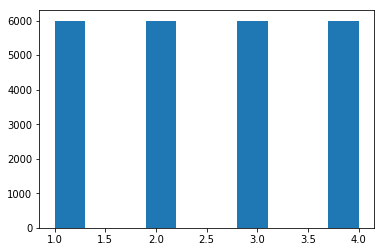

In [226]:
plt.hist(DataFrame(X_samp)[134])

In [227]:
train_zero = DataFrame(X_samp,columns = train_zero[train_chr].columns)

In [228]:
filtering = ["r4","tamhog","tamviv","hhsize","hogar", "inst", "Id","Target"]
train_filt = list()
train_ind = list()

for i in train_zero.columns:
    for j in filtering:
        if i.startswith(j) is True:
            #필터링 변수에 담는다
            train_filt.append(i)
        else : pass
    if i not in train_filt:
        #필터링 변수와 일치하지 않으면 컬럼 리스트에 담는다.
        train_ind.append(i)
        
train_zero[train_ind].head(5)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,escolari,paredblolad,...,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,agesq
0,120000.000000,0.0,3.0,0.0,1.0,1.0,0.0,0.0,10.0,1.0,...,0.0,43.0,100.0,1849.0,1.0,100.0,0.0,1.000000,0.0,1849.0
1,164294.629261,0.0,4.0,0.0,1.0,1.0,1.0,1.0,12.0,0.0,...,0.0,67.0,144.0,4489.0,1.0,144.0,0.0,1.000000,64.0,4489.0
2,193589.258521,0.0,8.0,0.0,1.0,1.0,0.0,0.0,11.0,0.0,...,0.0,92.0,121.0,8464.0,1.0,0.0,0.0,0.250000,64.0,8464.0
3,375270.000000,0.0,5.0,0.0,1.0,1.0,1.0,1.0,9.0,1.0,...,0.0,17.0,81.0,289.0,16.0,121.0,4.0,1.777778,1.0,289.0
4,200000.000000,0.0,5.0,0.0,1.0,1.0,1.0,1.0,11.0,1.0,...,0.0,37.0,121.0,1369.0,16.0,121.0,4.0,1.777778,1.0,1369.0


In [236]:
#타겟 불균형 상태인 원본 데이터셋

## target variable 
target_index = {1:0, 2:1, 3:2, 4:3}
target = np.array([target_index[c] for c in target["Target"]])

In [184]:
# 업샘플링한 수정 데이터셋

## target variable 
target_index = {1:0, 2:1, 3:2, 4:3}
target_zero = np.array([target_index[c] for c in y_samp])

## 모델 적합

In [232]:
#타겟 불균형 상태인 원본 데이터셋
def label_encoding(col):
    le = LabelEncoder()
    le.fit(list(train[col].values) + list(test[col].values))
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

features = train.columns
num_cols = train._get_numeric_data().columns
cat_cols = list(set(features) - set(num_cols))
for col in cat_cols:
    label_encoding(col)

In [233]:
del train["Target"]

In [239]:
#타겟 불균형 상태인 원본 데이터셋
X_train, X_valid, y_train, y_valid = train_test_split(train[train_ind].values, target, test_size=0.2, random_state=1)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid)

In [229]:
#업샘플링하여 타겟을 맞춘 수정데이터셋
X_train, X_valid, y_train, y_valid = train_test_split(train_zero[train_ind].values, target_zero, test_size=0.2, random_state=1)
lgb_train_zero = lgb.Dataset(X_train, y_train)
lgb_valid_zero = lgb.Dataset(X_valid, y_valid)

In [134]:
## 모형이 결과를 평가할 수 있도록 평가함수를 작성해준다.
## 예측값이 담겨있는 preds와 정답값이 담겨있는 dtrain을 받아서
## 예측값이 담겨있는 preds는 n x 4로 재배열을 해준다 [0.123,0,0001,0,781,0.124]
## 이 중 최대확률값을 argmax로 찾아서 그 인덱스값을 도출한다
## 그 최대값을 정답값 벡터와 함께 투입하여 f1_score를 도출한다.

from sklearn.metrics import f1_score

def manual_scoring(preds, dtrain):
    labels = dtrain.get_label()
    preds = preds.reshape(-1, 4)  
    preds = preds.argmax(axis = 1)
    f_score = f1_score(preds, labels, average = 'macro')
    return 'f1_score', f_score, True

evals_result = {}

In [240]:
#껍데기 모델을 만들어준다.

model4 = lgb.LGBMClassifier(boosting_type = "gbdt",
                            objective = "mutliclass",
                            max_depth = -1,
                            random_state = 0)

In [22]:
gridParams = {
    'learning_rate': [0.01, 0.005],
    'n_estimators': [40,80,100],
    'num_leaves': [10,20,30,40],
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    }


grid = GridSearchCV(model4, 
                    gridParams,
                    verbose = 0,
                    cv=5,n_jobs=-1)

NameError: name 'GridSearchCV' is not defined

In [242]:
grid.fit(train_zero[train_ind], target)

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective='mutliclass',
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.005], 'n_estimators': [40, 80, 100], 'num_leaves': [10, 20, 30, 40], 'colsample_bytree': [0.65, 0.66], 'subsample': [0.7, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [243]:
# 학습률, 트리의 수, 가지의 수의 best_params
# 학습률은 의외로 0.01이 0.005일 때보다 성능이 좋았고
# 학습기의 수는 역시 많으면 많을수록 좋았고
# 허용된 가지의 수는 10개. 좀 의외인 부분
# 표본 샘플링은 70%, 특성 샘플링은 0.65일때 성능이 준수한 것으로 나타났다.

grid.best_params_

{'colsample_bytree': 0.66,
 'learning_rate': 0.01,
 'n_estimators': 100,
 'num_leaves': 10,
 'subsample': 0.7}

Training until validation scores don't improve for 1000 rounds.
[100]	training's multi_logloss: 0.891645	training's f1_score: 0.208576	valid_1's multi_logloss: 0.893271	valid_1's f1_score: 0.200877
[200]	training's multi_logloss: 0.814332	training's f1_score: 0.209918	valid_1's multi_logloss: 0.822118	valid_1's f1_score: 0.203227
[300]	training's multi_logloss: 0.76769	training's f1_score: 0.209417	valid_1's multi_logloss: 0.781596	valid_1's f1_score: 0.203967
[400]	training's multi_logloss: 0.734728	training's f1_score: 0.210143	valid_1's multi_logloss: 0.753967	valid_1's f1_score: 0.204472
[500]	training's multi_logloss: 0.709795	training's f1_score: 0.210177	valid_1's multi_logloss: 0.735401	valid_1's f1_score: 0.209041
[600]	training's multi_logloss: 0.688183	training's f1_score: 0.210287	valid_1's multi_logloss: 0.719064	valid_1's f1_score: 0.208333
[700]	training's multi_logloss: 0.670215	training's f1_score: 0.209526	valid_1's multi_logloss: 0.705892	valid_1's f1_score: 0.209581

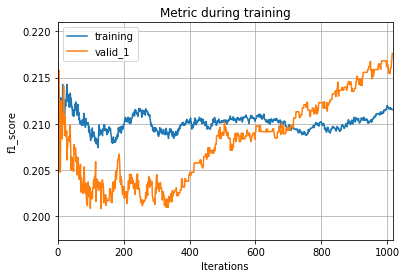

In [248]:
evals_result = dict()

## 타겟 불균형 상태인 원본 데이터셋
params = {'boosting_type': 'gbdt', 'objective': 'multiclass', 'metric': 'multi_logloss',
          'num_class': 4, 'max_depth': -1, 'num_leaves': 10, 'learning_rate': 0.01,
          "n_estimator" : 100000, "subsample" : 0.7, "colsample_bytree" : 0.65,'verbose': -1, 'num_threads': -1 }

model1 = lgb.train(params, lgb_train, num_boost_round=3000,  valid_sets=[lgb_train, lgb_valid], 
                  early_stopping_rounds=1000, verbose_eval=100,feval = manual_scoring,evals_result=evals_result)

lgb.plot_metric(evals_result)

Training until validation scores don't improve for 1000 rounds.
[100]	training's multi_logloss: 0.810651	training's f1_score: 0.246292	valid_1's multi_logloss: 0.807326	valid_1's f1_score: 0.258242
[200]	training's multi_logloss: 0.55199	training's f1_score: 0.247739	valid_1's multi_logloss: 0.546872	valid_1's f1_score: 0.255943
[300]	training's multi_logloss: 0.420892	training's f1_score: 0.248831	valid_1's multi_logloss: 0.416615	valid_1's f1_score: 0.256187
[400]	training's multi_logloss: 0.348383	training's f1_score: 0.247578	valid_1's multi_logloss: 0.346515	valid_1's f1_score: 0.252826
[500]	training's multi_logloss: 0.302647	training's f1_score: 0.247428	valid_1's multi_logloss: 0.302795	valid_1's f1_score: 0.254953
[600]	training's multi_logloss: 0.270896	training's f1_score: 0.246749	valid_1's multi_logloss: 0.273567	valid_1's f1_score: 0.257048
[700]	training's multi_logloss: 0.246656	training's f1_score: 0.245652	valid_1's multi_logloss: 0.25182	valid_1's f1_score: 0.255165


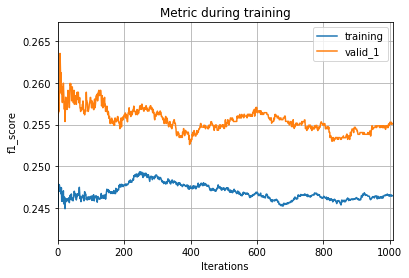

In [247]:
업샘플링하여 타겟을 맞춘 수정데이터셋
params = {'boosting_type': 'gbdt', 'objective': 'multiclass', 'metric': 'multi_logloss',
          'num_class': 4, 'max_depth': -1, 'num_leaves': 10, 'learning_rate': 0.01,
          "n_estimator" : 100000, "subsample" : 0.7, "colsample_bytree" : 0.65,'verbose': -1, 'num_threads': -1 }

model1 = lgb.train(params, lgb_train_zero, num_boost_round=3000,  valid_sets=[lgb_train_zero, lgb_valid_zero], 
                  early_stopping_rounds=1000, verbose_eval=100,feval = manual_scoring,evals_result=evals_result)

lgb.plot_metric(evals_result)